In [0]:
# CNC vs VMC
> This notebook creates image classifier to distinguish between CNC lathes which are sometimes called CNCs and Vertical Machining centers which are called VMCs

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages,CNC, lathe, VMC, jupyter]
- author: Sharan Kumar
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [0]:
## HI this is sharan creating. VMC Vs CNC image classifier. 
##  Used Fast.AI library for this.

In [0]:
!pip install icrawler

In [0]:
from icrawler.builtin import (BingImageCrawler, GoogleImageCrawler)
import logging

In [0]:
keyword = 'Vertical maching center'

In [0]:
!mkdir VMCvsCNC

In [0]:
VMCvsCNC ='./content/VMC'
search_filters_google = dict()

google_crawler = GoogleImageCrawler(downloader_threads=4,storage={'root_dir': VMCvsCNC},log_level=logging.INFO)
google_crawler.crawl(keyword=keyword, filters=search_filters_google, max_num=1000)

2019-09-30 03:07:58,327 - INFO - icrawler.crawler - start crawling...
2019-09-30 03:07:58,332 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-09-30 03:07:58,336 - INFO - icrawler.crawler - starting 1 parser threads...
2019-09-30 03:07:58,338 - INFO - icrawler.crawler - starting 4 downloader threads...
2019-09-30 03:07:58,973 - INFO - parser - parsing result page https://www.google.com/search?q=Vertical+maching+center&ijn=0&start=0&tbs=&tbm=isch
2019-09-30 03:07:59,107 - INFO - downloader - image #1	https://www.normanmachinetool.com/wp-content/uploads/2019/03/8441-HAAS-VF-2D-CNC-3-AXIS-VERTICAL-MILLING-MACHINE-1.jpg
2019-09-30 03:07:59,204 - INFO - downloader - image #2	https://images-na.ssl-images-amazon.com/images/I/61-TUPlQpOL._SX466_.jpg
2019-09-30 03:07:59,293 - INFO - downloader - image #3	https://vixkbjgsij-flywheel.netdna-ssl.com/wp-content/uploads/2018/05/Kent-CNC-KVR-4020A-Vertical-Machining-Center.png
2019-09-30 03:07:59,337 - INFO - downloader - image #4	https:

In [0]:
keyword = 'CNC lathe'
!mkdir CNC
VMCvsCNC ='./content/CNC'
search_filters_google = dict()

google_crawler = GoogleImageCrawler(downloader_threads=4,storage={'root_dir': VMCvsCNC},log_level=logging.INFO)
google_crawler.crawl(keyword=keyword, filters=search_filters_google, max_num=1000)

2019-09-30 03:11:14,003 - INFO - icrawler.crawler - start crawling...
2019-09-30 03:11:14,004 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-09-30 03:11:14,006 - INFO - icrawler.crawler - starting 1 parser threads...
2019-09-30 03:11:14,015 - INFO - icrawler.crawler - starting 4 downloader threads...
2019-09-30 03:11:14,549 - INFO - parser - parsing result page https://www.google.com/search?q=CNC+lathe&ijn=0&start=0&tbs=&tbm=isch
2019-09-30 03:11:14,777 - INFO - downloader - image #1	https://www.normanmachinetool.com/wp-content/uploads/2018/08/7966-CLAUSING-COLCHESTER-CNC200-STORM-2-AXIS-CNC-LATHE-1.jpg
2019-09-30 03:11:14,959 - INFO - downloader - image #2	https://34h49vqklr1l2ajs1xqmjgzq-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/1440-cnc-lathe-600x527.png
2019-09-30 03:11:14,975 - INFO - downloader - image #3	https://image.made-in-china.com/2f0j00DjMavLPtsBgR/Precision-China-CNC-Lathe-Machine-Price-CK6152E-.jpg
2019-09-30 03:11:15,075 - INFO - downloader - ima

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
!pwd

/content


In [0]:
path = "/content/content"

In [0]:
tfms = get_transforms(do_flip=False)
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch()
        .normalize(imagenet_stats))

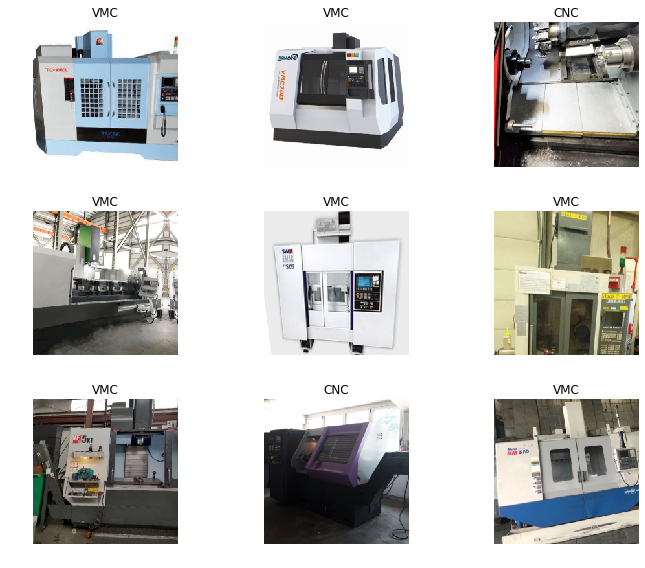

In [0]:
data.show_batch(rows=3, figsize=(10,8))

In [0]:
print(data.classes)

['CNC', 'VMC']


In [0]:
len(data.classes), data.c

(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83425276.68it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.764040,0.545058,0.744094,06:42
1,0.596286,0.421053,0.834646,06:40
2,0.481726,0.406174,0.842520,06:40
3,0.410549,0.399634,0.842520,06:42
4,0.373992,0.382920,0.862205,06:43
